## Waffle House Index Monitor
As COVID-19 progresses, Waffle House - a southern staple known for being the gauge by which FEMA attributes severity of natural disasters - is responding by shutting down locations, which matches the level of unprecedentedness of this global pandemic. For locations that remain open, they are doing To-Go orders for all customers.

This notebook allows you to access their locations API and make your own map of current closures. More features may be added later to get fancier.

In [1]:
import geopandas as gpd
import pandas as pd
import requests
import fiona

In [2]:
url = 'https://locations.wafflehouse.com/api/587d236eeb89fb17504336db/locations-details'

In [3]:
data = requests.get(url)

In [4]:
gdf = gpd.read_file(url)

In [5]:
gdf.head()

,name,id,branch,slug,addressLine1,addressLine2,city,province,postalCode,country,...,locationsListCta,website,mallName,shortDescription,longDescription,snippetDescription,email,manuallyAddedListings,socialMedias,geometry
0,Waffle House,57129dbbc49072572ed4ab15,1976,nc-lenoir-1976,220 Blowing Rock Blvd,,Lenoir,NORTH CAROLINA,28645,UNITED STATES,...,{'ctas': []},https://locations.wafflehouse.com/nc-lenoir-1976,,"All food is prepared fresh, cooked to order an...","Headquartered in Norcross, GA, Waffle House® r...","Open 24 hours a day, 365 days a year.",,"[ { ""url"": ""https:\/\/www.facebook.com\/Waffle...","[ { ""name"": ""facebook"", ""url"": ""https:\/\/www....",POINT (-81.52418 35.91727)
1,Waffle House,571429266d0acf1a2d60eb13,1973,ar-north-little-rock-1973,7300 Innerplan Dr,,North Little Rock,ARKANSAS,72113-7645,UNITED STATES,...,{'ctas': []},https://locations.wafflehouse.com/ar-north-lit...,,"All food is prepared fresh, cooked to order an...","Headquartered in Norcross, GA, Waffle House® r...","Open 24 hours a day, 365 days a year.",,"[ { ""url"": ""https:\/\/www.yelp.com\/biz\/waffl...","[ { ""name"": ""facebook"", ""url"": ""https:\/\/www....",POINT (-92.37741 34.82474)
2,Waffle House,5714292fc49072572ed4ab86,1950,sc-darlington-1950,1520 S Main St,,Darlington,SOUTH CAROLINA,29532-5660,UNITED STATES,...,{'ctas': []},https://locations.wafflehouse.com/sc-darlingto...,,"All food is prepared fresh, cooked to order an...","Headquartered in Norcross, GA, Waffle House® r...","Open 24 hours a day, 365 days a year.",,"[ { ""url"": ""https:\/\/www.yelp.com\/biz\/waffl...","[ { ""name"": ""facebook"", ""url"": ""https:\/\/www....",POINT (-79.85614 34.28085)
3,Waffle House,571504900b912de13ea624da,201,ms-gulfport-201,4324 W Beach Blvd,,Gulfport,MISSISSIPPI,39501-1327,UNITED STATES,...,{'ctas': []},https://locations.wafflehouse.com/ms-gulfport-201,,"All food is prepared fresh, cooked to order an...","Headquartered in Norcross, GA, Waffle House® r...","Open 24 hours a day, 365 days a year.",,"[ { ""url"": ""https:\/\/www.yelp.com\/biz\/waffl...","[ { ""name"": ""facebook"", ""url"": ""https:\/\/www....",POINT (-89.11364 30.35832)
4,Waffle House,571504a40b912de13ea624dc,206,tx-arlington-206,2221 S Cooper St,,Arlington,TEXAS,76013-6327,UNITED STATES,...,{'ctas': []},https://locations.wafflehouse.com/tx-arlington...,,"All food is prepared fresh, cooked to order an...","Headquartered in Norcross, GA, Waffle House® r...","Open 24 hours a day, 365 days a year.",,"[ { ""url"": ""https:\/\/www.yelp.com\/biz\/waffl...","[ { ""name"": ""facebook"", ""url"": ""https:\/\/www....",POINT (-97.11660 32.70669)


In [6]:
gdf.columns

Index(['name', 'id', 'branch', 'slug', 'addressLine1', 'addressLine2', 'city',
       'province', 'postalCode', 'country', 'phoneNumber', 'phoneLabel',
       'hoursOfOperation', 'cmsFeatures', 'storeFront', 'timezone',
       'locationsListCta', 'website', 'mallName', 'shortDescription',
       'longDescription', 'snippetDescription', 'email',
       'manuallyAddedListings', 'socialMedias', 'geometry'],
      dtype='object')

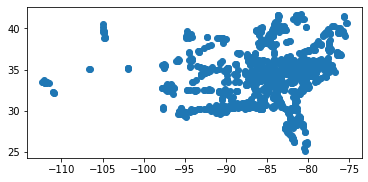

In [7]:
gdf.plot()

In [8]:
gdf.iloc[3]

name                                                          Waffle House
id                                                571504900b912de13ea624da
branch                                                                 201
slug                                                       ms-gulfport-201
addressLine1                                             4324 W Beach Blvd
addressLine2                                                              
city                                                              Gulfport
province                                                       MISSISSIPPI
postalCode                                                      39501-1327
country                                                      UNITED STATES
phoneNumber                                                +1 228-867-9911
phoneLabel                                                  (228) 867-9911
hoursOfOperation         {'Mon': [['00:00', '23:59']], 'Tue': [['00:00'...
cmsFeatures              

In [9]:
metadata = data.json()

In [10]:
metadata['features'][3]['properties']['slug']

'ms-gulfport-201'

In [11]:
loc_isClosed = []
for feature in metadata['features']:
    dict1 = {}
    slug = {'slug' : feature['properties']['slug']}
    dict1.update(slug)
    try:
        isClosed = {'isClosed' : feature['properties']['specialHoursOfOperation'][0]['isClosed']}
        dict1.update(isClosed)
    except:
        isClosed = {'isClosed' : False}
        dict1.update(isClosed)
    finally:
        loc_isClosed.append(dict1)

In [12]:
loc_closed = pd.DataFrame(loc_isClosed)

Lets Merge the isClosed with our geopandas frame, by using `merge`

In [13]:
gdf_closures = gdf.merge(loc_closed, on='slug')

In [14]:
gdf_closures = gdf_closures.to_crs("EPSG:5070")

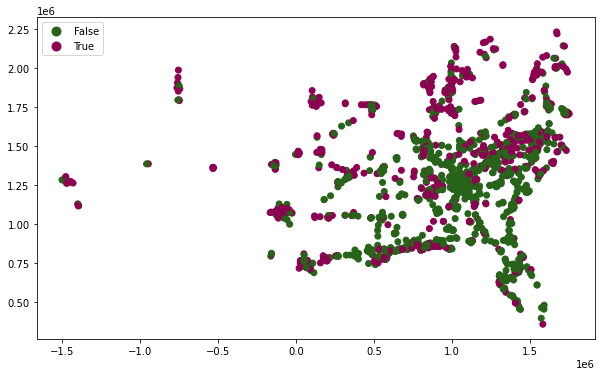

In [15]:
ax = gdf_closures.plot(cmap = 'PiYG_r', column='isClosed', legend=True, categorical = True, figsize=(10,15))

In [16]:
num_closed = gdf_closures.query('isClosed == True').isClosed.count()

In [17]:
total_loc = gdf_closures.isClosed.count()

In [18]:
ax.set_title(f'Waffle House Index: {num_closed} of {total_loc} Closed')

Text(0.5, 1.0, 'Waffle House Index: 614 of 1967 Closed')

Recall that the FEMA index is not just open/closed. It's also if serving full menu or limited menu.
While the status of limited menu or full menu isn't found in the API, if you look at the website, some locations are not open 24 hours. So let's see how many locations are Open 24 hours, Open Reduced Hours, and Closed as an analogy of the WHI. 

In [19]:
loc_isClosed = []
for feature in metadata['features']:
    dict1 = {}
    slug = {'slug' : feature['properties']['slug']}
    dict1.update(slug)
    try:
        try_isClosed = feature['properties']['specialHoursOfOperation'][0]['isClosed']
        isClosed = {'isClosed' : try_isClosed}
        if feature['properties']['specialHoursOfOperation'][0]['isClosed'] is False:
            try_24hrs = feature['properties']['specialHoursOfOperation'][0]['_24hrs']
            _24hrs = {'_24hrs' : try_24hrs}
        else:
            _24hrs = {'_24hrs' : False}
        dict1.update(isClosed)
        dict1.update(_24hrs)
    except:
        isClosed = {'isClosed' : False}
        _24hrs = {'_24hrs' : True}
        dict1.update(isClosed)
        dict1.update(_24hrs)
    finally:
        loc_isClosed.append(dict1)

In [20]:
loc_closed = pd.DataFrame(loc_isClosed)

In [21]:
gdf_closures = gdf.merge(loc_closed, on='slug')

Let's make a new column `status` with the following conditions:
- `isClosed` is `True` ---> `Closed`
- `isClosed` is `False` AND `_24hrs` is `False` ---> `Limited Hours`
- `isClosed` is `False` AND `_24hrs` is `True` ---> `Open`

While we could use `df.apply` here with minimal performance difference (1967 rows), let's use a [speedup suggested by the SO community](https://stackoverflow.com/a/53505512): `np.select`. 

In [23]:
import numpy as np

In [24]:
status_conditions = [
    gdf_closures['isClosed'] == True,
    np.logical_and((gdf_closures['isClosed'] == False),(gdf_closures['_24hrs'] == False)),
    np.logical_and((gdf_closures['isClosed'] == False),(gdf_closures['_24hrs'] == True)),
]
status_outputs = [
    'Closed',
    'Limited Hours',
    'Open'
]

let's check that this gives us the right output

In [25]:
res = np.select(status_conditions, status_outputs, 'bl')
res = pd.Series(res)

In [26]:
res.head(20)

0            Closed
1              Open
2              Open
3            Closed
4              Open
5              Open
6              Open
7              Open
8              Open
9              Open
10           Closed
11             Open
12             Open
13             Open
14             Open
15             Open
16             Open
17           Closed
18           Closed
19    Limited Hours
dtype: object

In [27]:
gdf_closures['status'] = res

In [28]:
num_limited_hours = gdf_closures.query('status == "Limited Hours"').status.count()

In [29]:
num_limited_hours

108

In [30]:
gdf_closures = gdf_closures.to_crs("EPSG:5070")

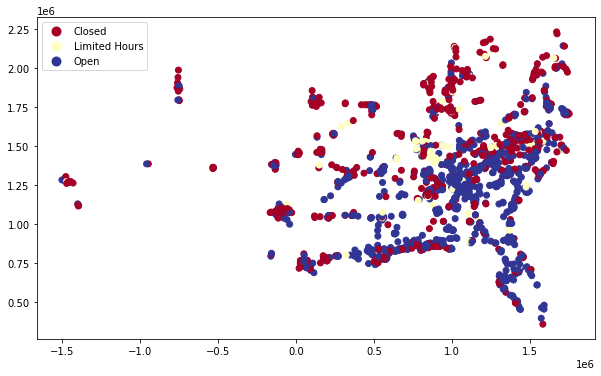

In [31]:
ax = gdf_closures.plot(cmap = 'RdYlBu', column='status', legend=True, categorical = True, figsize=(10,15))

Now we see a more nuanced picture, but let's add some state shapes to bring out where the locations are.

We could import a shapefile here and do the transformations, if `matplotlib` is where you want to build your map (a reasonably good thing to do). Since interactive visualization is what we're after, let's cheat with using `plotly`. 

In [67]:
gdf_closures = gdf_closures.to_crs("EPSG:4326") #convert back to lat/lon

In [63]:
from shapely.geometry import Point, mapping, shape

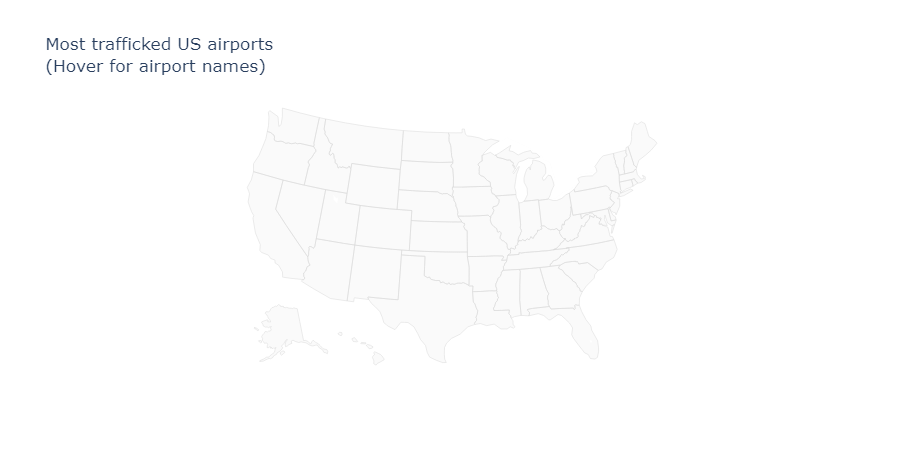

In [77]:
import plotly.graph_objects as go

#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
#df['text'] = df['airport'] + '' + df['city'] + ', ' + df['state'] + '' + 'Arrivals: ' + df['cnt'].astype(str)

fig = go.Figure(data=go.Scattergeo(
        geojson = mapping(gdf_closures['geometry']),
        text = gdf_closures['slug'],
        mode = 'markers',
        showlegend=True,
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Blues',
            color = 
            colorbar_title="Incoming flights<br>February 2011"
        )))

fig.update_layout(
        title = 'Most trafficked US airports<br>(Hover for airport names)',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )
fig.show()

In [32]:
states_background = gpd.read_file('gz_2010_us_040_00_5m.geojson')

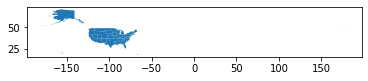

In [33]:
states_background.plot()

In [47]:
Search_for_These_values = ['Alaska','Hawaii','Puerto Rico'] # for map purposes, since Waffle House is only in 20 states
                                                            # in the lower 48, let's just remove 2 states + commonwealth

pattern = '|'.join(Search_for_These_values)

states_background = states_background.loc[~(states_background['NAME'].str.contains(pattern, case=False))]

In [50]:
states_background = states_background.to_crs("EPSG:5070")

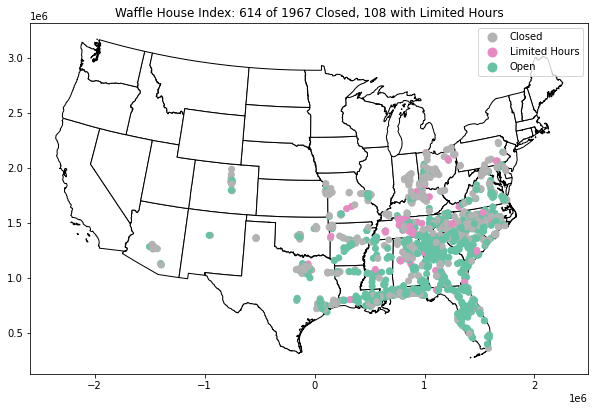

In [59]:
base = states_background.plot(color='white', edgecolor='black', figsize=(10,15))
base.set_title(f'Waffle House Index: {num_closed} of {total_loc} Closed, {num_limited_hours} with Limited Hours')
gdf_closures.plot(ax = base, cmap = 'Set2_r', column='status', legend=True, categorical = True)